In [1]:
import re

In [2]:
import pandas

In [3]:
import os

In [4]:
entries = os.listdir('Alzheimer’s Disease docs/')

In [5]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
dictiongene=['DOI','DNA','MEDLINE','METHODS','LIMITATION','RESULTS','BACKGROUND','CONCLUSION','PMID','INTRODUCTION','METHODOLOGY','PMCID']
data=[]
for i in range(len(entries)):
    path='Alzheimer’s Disease docs/'+entries[i]
    with open(path) as f:
        x=list(re.findall("[A-Z][A-Z0-9-]+",f.read()))
        l1=re.findall("C[0-9]+",f.read())
        if l1!= []:
            x.append(l1)
        l2=re.findall("f[0-9]+",f.read())
        if l2!=[]:
            x.append(l2)
        finx=[]
        x=set(x)
        for i in x:
            if i not in stop_words and i not in dictiongene and len(i) is not 2:
                finx.append(i)
        finx.sort()
        data.append(finx)
        
        
print(data)

[['ABCA7', 'AD-', 'NGS', 'SORL1', 'TREM2'], ['APOE', 'BELNEU', 'FTD', 'R47H', 'TREM2', 'VIB'], ['CIBERER', 'DAT', 'IIS-FJD', 'JAD-170590', 'SORL1'], ['TREM2'], ['PMC5010724', 'R136Q', 'R47C', 'R47H', 'S31F', 'SKAT', 'TREM2', 'UCSF', 'USA'], ['ABCA7', 'AIM', 'APOE', 'BDR', 'CD33', 'CLU', 'CONCLUSIONS', 'DRI', 'FTD', 'GWAS', 'LOAD', 'LRRK2', 'MED', 'NGS', 'PILRA', 'PMC6005734', 'PRS', 'SLC24A4', 'UCL', 'USA', 'ZCWPW1'], ['CEA', 'CHU', 'CNR-MAJ', 'CNRS', 'EOAD', 'IRIB', 'SORL1', 'U1079', 'U1167', 'U897', 'UMR', 'UMR1078'], ['APP', 'BACE1', 'EST', 'PMC6900319', 'PSEN1', 'PSEN2'], ['ABCA7', 'APOE', 'CEA', 'CHRU', 'CHU', 'CNR', 'CNR-MAJ', 'CNRS', 'DISTALZ', 'EOAD', 'LOAD', 'MAJ', 'RID-AGE-R', 'SORL1', 'TREM2', 'U1167', 'U1167-E', 'U1245', 'UMR', 'UMR-1078', 'UMR-1087', 'UMR-S', 'UMR1219', 'UNIROUEN'], ['APP', 'PMC2131721', 'SNP', 'SORL1', 'USA'], ['AC-MAF', 'APOE', 'APOE-', 'APP', 'CADD', 'MAF', 'PMC5567154', 'PSEN1', 'PSEN2', 'SORL1', 'USA'], ['CDE', 'CIBERNED', 'CIMA', 'EOAD', 'EOD', 'IDIB

In [7]:
import pandas as pd
genedata=[]
for i in range(len(data)):
    l=[]
    l.append('R'+str(i+1))
    l.append(data[i])
    genedata.append(l)
#print(genedata)
df=pd.DataFrame(genedata,columns=["record no","gene symbols"])
df

record no                                       gene symbols
0         R1                    [ABCA7, AD-, NGS, SORL1, TREM2]
1         R2              [APOE, BELNEU, FTD, R47H, TREM2, VIB]
2         R3         [CIBERER, DAT, IIS-FJD, JAD-170590, SORL1]
3         R4                                            [TREM2]
4         R5  [PMC5010724, R136Q, R47C, R47H, S31F, SKAT, TR...
5         R6  [ABCA7, AIM, APOE, BDR, CD33, CLU, CONCLUSIONS...
6         R7  [CEA, CHU, CNR-MAJ, CNRS, EOAD, IRIB, SORL1, U...
7         R8        [APP, BACE1, EST, PMC6900319, PSEN1, PSEN2]
8         R9  [ABCA7, APOE, CEA, CHRU, CHU, CNR, CNR-MAJ, CN...
9        R10                 [APP, PMC2131721, SNP, SORL1, USA]
10       R11  [AC-MAF, APOE, APOE-, APP, CADD, MAF, PMC55671...
11       R12  [CDE, CIBERNED, CIMA, EOAD, EOD, IDIBAPS, IIB,...
12       R13                          [H157Y, R47H, TREM2, USA]
13       R14                         [GAB2, PICALM, SNP, SORL1]
14       R15  [A673T, ABCA7, APOE, APP, CNR-MAJ, MAF, PSEN1,...
15       R16  [APOE4, CSF, SNP19, SNP21, SNP21G-, SNP23, SNP...
16       R17                     [CTL, GSE63060, GSE63061, MCI]
17       R18                                              [APP]
18       R19  [ABSTRACT, APP, APP717, CJD, FAD, GSS, OS-2, O...
19       R20                                              [APP]
20       R21                                              [APP]
21       R22                                     [APP, D21S210]
22       R23                                              [E-4]
23       R24                   [AP1, AP2, APP, H2B, SP1, TFIID]
24       R25                            [N141, S182, STM2, USA]
25       R26  [APOE, APP, APP670, APP692, APP717, CGG, FAD, ...
26       R27           [OPRD1, OPRK1, OPRL1, OPRM1, PMC6172396]
27       R28  [ADAD, APP, APPARC, APPSWE, PSEN1, PSEN1H163Y,...
28       R29  [INSERM, MT-ATP6, MT-C03, MT-CO1, MT-CO2, MT-N...
29       R30  [INSERM, MT-ATP6, MT-C03, MT-CO1, MT-CO2, MT-N...
30       R31                    [APOE, CH25H, CLU, LDLR, SORL1]
31       R32     [ABCA7, JAD-170872, PCR, PMC5890296, RNA, USA]
32       R33                                             [APOE]
33       R34                                  [JAD-131061, USA]
34       R35  [AD-, CONCLUSIONS, CREB, CRTC1, PCR, PMC483751...
35       R36  [ACTB, APP, GAPDH, MAPT, PCR, PMC3573079, RPS1...
36       R37  [APOE, INSPE, IRCCS, JAD-141167, TMEM106, TMEM...
37       R38                                                 []
38       R39                          [OBJECTIVE, PSEN1, Q222L]
39       R40                 [CASE, EOAD, PRESENTATION, PSEN-1]
40       R41                                                 []
41       R42  [ABCA1, ATP-, CEU, CIBERNED, JAD-2010-100432, ...
42       R43              [CNR, P21, RS1059234, RS1801270, SNP]
43       R44                                 [DLST, S0140-6736]
44       R45                                                 []
45       R46                                              [A4-]
46       R47                        [E26, ETS, ETS2, PMC282255]
47       R48                        [AP-1, GC-, PAD, RNA, TATA]
48       R49                                  [E26, ETS1, ETS2]
49       R50  [APP, APP695, FEBS, FRG, NGF, RNA, SH-SY5Y, ZMBH]
50       R51                    [ABCA7, AD-, NGS, SORL1, TREM2]

In [8]:
def createC1(data):
    """
    Create a list of unique items in transaction data.
    Represent each item as a set of length 1.
    """
    C1 = []
    for transaction in data:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    
    # create a set for each item in C1
    return [set(x) for x in C1]
def createCk(Lk, k):
    """
    Create a list of candidates of length k.
    
    Arguments:
       Lk: a list of frequent itemsets
       k: the size of the itemsets
    
    """
    cand_list = []
    len_Lk = len(Lk)
    
    # join sets if first k-2 items are equal
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])
    
    return cand_list

In [9]:
def scanD(data, Ck, min_support):
    """
    Scan through transaction data and return a list of candidates that meet
    the support threshold, and support data about the current candidates.
    
    Arguments:
       data: data set,
       Ck: a list of candidate sets
       min_support: the minimum support
    """
    count = {}
    for transaction in data:
        tr = set(transaction)
        for candidate in Ck:
            if candidate.issubset(tr):
                can = frozenset(candidate)
                if can not in count:
                    count[can] = 1
                else:
                    count[can] += 1
                    num_items = float(len(D))
    
    cand_list = []
    support_data = {}
    
    # calculate support for every itemset
    for key in count:
        support = count[key]/num_items
        
        # If the support meets the minimum support requirements, 
        # add it to the list of itemsets.
        if support >= min_support:
            cand_list.insert(0, key)
        support_data[key] = support
    
    return cand_list, support_data

In [10]:
min_support = 0.05

In [11]:
C1 = createC1(data)
C1

[{'A4-'},
 {'A673T'},
 {'ABCA1'},
 {'ABCA7'},
 {'ABSTRACT'},
 {'AC-MAF'},
 {'ACTB'},
 {'AD-'},
 {'ADAD'},
 {'AIM'},
 {'AP-1'},
 {'AP1'},
 {'AP2'},
 {'APOE'},
 {'APOE-'},
 {'APOE4'},
 {'APP'},
 {'APP670'},
 {'APP692'},
 {'APP695'},
 {'APP717'},
 {'APPARC'},
 {'APPSWE'},
 {'ATP-'},
 {'BACE1'},
 {'BDR'},
 {'BELNEU'},
 {'CADD'},
 {'CASE'},
 {'CD33'},
 {'CDE'},
 {'CEA'},
 {'CEU'},
 {'CGG'},
 {'CH25H'},
 {'CHRU'},
 {'CHU'},
 {'CIBERER'},
 {'CIBERNED'},
 {'CIMA'},
 {'CJD'},
 {'CLU'},
 {'CNR'},
 {'CNR-MAJ'},
 {'CNRS'},
 {'CONCLUSIONS'},
 {'CREB'},
 {'CRTC1'},
 {'CSF'},
 {'CTL'},
 {'D21S210'},
 {'DAT'},
 {'DISTALZ'},
 {'DLST'},
 {'DRI'},
 {'E-4'},
 {'E26'},
 {'EOAD'},
 {'EOD'},
 {'EST'},
 {'ETS'},
 {'ETS1'},
 {'ETS2'},
 {'FAD'},
 {'FEBS'},
 {'FRG'},
 {'FTD'},
 {'GAB2'},
 {'GAPDH'},
 {'GC-'},
 {'GSE63060'},
 {'GSE63061'},
 {'GSS'},
 {'GWAS'},
 {'H157Y'},
 {'H2B'},
 {'IDIBAPS'},
 {'IIB'},
 {'III'},
 {'IIS-FJD'},
 {'INSERM'},
 {'INSPE'},
 {'IRCCS'},
 {'IRIB'},
 {'JAD-131061'},
 {'JAD-141167'},
 {'

In [12]:
D = list(map(set, data))
D

[{'ABCA7', 'AD-', 'NGS', 'SORL1', 'TREM2'},
 {'APOE', 'BELNEU', 'FTD', 'R47H', 'TREM2', 'VIB'},
 {'CIBERER', 'DAT', 'IIS-FJD', 'JAD-170590', 'SORL1'},
 {'TREM2'},
 {'PMC5010724',
  'R136Q',
  'R47C',
  'R47H',
  'S31F',
  'SKAT',
  'TREM2',
  'UCSF',
  'USA'},
 {'ABCA7',
  'AIM',
  'APOE',
  'BDR',
  'CD33',
  'CLU',
  'CONCLUSIONS',
  'DRI',
  'FTD',
  'GWAS',
  'LOAD',
  'LRRK2',
  'MED',
  'NGS',
  'PILRA',
  'PMC6005734',
  'PRS',
  'SLC24A4',
  'UCL',
  'USA',
  'ZCWPW1'},
 {'CEA',
  'CHU',
  'CNR-MAJ',
  'CNRS',
  'EOAD',
  'IRIB',
  'SORL1',
  'U1079',
  'U1167',
  'U897',
  'UMR',
  'UMR1078'},
 {'APP', 'BACE1', 'EST', 'PMC6900319', 'PSEN1', 'PSEN2'},
 {'ABCA7',
  'APOE',
  'CEA',
  'CHRU',
  'CHU',
  'CNR',
  'CNR-MAJ',
  'CNRS',
  'DISTALZ',
  'EOAD',
  'LOAD',
  'MAJ',
  'RID-AGE-R',
  'SORL1',
  'TREM2',
  'U1167',
  'U1167-E',
  'U1245',
  'UMR',
  'UMR-1078',
  'UMR-1087',
  'UMR-S',
  'UMR1219',
  'UNIROUEN'},
 {'APP', 'PMC2131721', 'SNP', 'SORL1', 'USA'},
 {'AC-MAF',
  

In [13]:
L1, support_data1 = scanD(D, C1, min_support)

In [14]:
L1

[frozenset({'PCR'}),
 frozenset({'RNA'}),
 frozenset({'SNP'}),
 frozenset({'PSEN2'}),
 frozenset({'PSEN1'}),
 frozenset({'APP'}),
 frozenset({'EOAD'}),
 frozenset({'CNR-MAJ'}),
 frozenset({'USA'}),
 frozenset({'R47H'}),
 frozenset({'APOE'}),
 frozenset({'TREM2'}),
 frozenset({'SORL1'}),
 frozenset({'NGS'}),
 frozenset({'AD-'}),
 frozenset({'ABCA7'})]

In [15]:
support_data1

{frozenset({'ABCA7'}): 0.11764705882352941,
 frozenset({'AD-'}): 0.058823529411764705,
 frozenset({'NGS'}): 0.058823529411764705,
 frozenset({'SORL1'}): 0.23529411764705882,
 frozenset({'TREM2'}): 0.1568627450980392,
 frozenset({'APOE'}): 0.17647058823529413,
 frozenset({'BELNEU'}): 0.0196078431372549,
 frozenset({'FTD'}): 0.0392156862745098,
 frozenset({'R47H'}): 0.0784313725490196,
 frozenset({'VIB'}): 0.0392156862745098,
 frozenset({'CIBERER'}): 0.0196078431372549,
 frozenset({'DAT'}): 0.0196078431372549,
 frozenset({'IIS-FJD'}): 0.0196078431372549,
 frozenset({'JAD-170590'}): 0.0196078431372549,
 frozenset({'PMC5010724'}): 0.0196078431372549,
 frozenset({'R136Q'}): 0.0196078431372549,
 frozenset({'R47C'}): 0.0196078431372549,
 frozenset({'S31F'}): 0.0196078431372549,
 frozenset({'SKAT'}): 0.0196078431372549,
 frozenset({'UCSF'}): 0.0196078431372549,
 frozenset({'USA'}): 0.1568627450980392,
 frozenset({'AIM'}): 0.0196078431372549,
 frozenset({'BDR'}): 0.0196078431372549,
 frozenset(

In [16]:
C2 = createCk(L1, k=2)
C2

[frozenset({'PCR', 'RNA'}),
 frozenset({'PCR', 'SNP'}),
 frozenset({'PCR', 'PSEN2'}),
 frozenset({'PCR', 'PSEN1'}),
 frozenset({'APP', 'PCR'}),
 frozenset({'EOAD', 'PCR'}),
 frozenset({'CNR-MAJ', 'PCR'}),
 frozenset({'PCR', 'USA'}),
 frozenset({'PCR', 'R47H'}),
 frozenset({'APOE', 'PCR'}),
 frozenset({'PCR', 'TREM2'}),
 frozenset({'PCR', 'SORL1'}),
 frozenset({'NGS', 'PCR'}),
 frozenset({'AD-', 'PCR'}),
 frozenset({'ABCA7', 'PCR'}),
 frozenset({'RNA', 'SNP'}),
 frozenset({'PSEN2', 'RNA'}),
 frozenset({'PSEN1', 'RNA'}),
 frozenset({'APP', 'RNA'}),
 frozenset({'EOAD', 'RNA'}),
 frozenset({'CNR-MAJ', 'RNA'}),
 frozenset({'RNA', 'USA'}),
 frozenset({'R47H', 'RNA'}),
 frozenset({'APOE', 'RNA'}),
 frozenset({'RNA', 'TREM2'}),
 frozenset({'RNA', 'SORL1'}),
 frozenset({'NGS', 'RNA'}),
 frozenset({'AD-', 'RNA'}),
 frozenset({'ABCA7', 'RNA'}),
 frozenset({'PSEN2', 'SNP'}),
 frozenset({'PSEN1', 'SNP'}),
 frozenset({'APP', 'SNP'}),
 frozenset({'EOAD', 'SNP'}),
 frozenset({'CNR-MAJ', 'SNP'}),
 froz

In [17]:
L2, support_data2 = scanD(D, C2, min_support)


In [18]:
L2


[frozenset({'APOE', 'APP'}),
 frozenset({'APP', 'SORL1'}),
 frozenset({'APOE', 'SORL1'}),
 frozenset({'APP', 'PSEN1'}),
 frozenset({'APP', 'PSEN2'}),
 frozenset({'PSEN1', 'PSEN2'}),
 frozenset({'CNR-MAJ', 'SORL1'}),
 frozenset({'EOAD', 'SORL1'}),
 frozenset({'ABCA7', 'APOE'}),
 frozenset({'APOE', 'TREM2'}),
 frozenset({'R47H', 'TREM2'}),
 frozenset({'ABCA7', 'NGS'}),
 frozenset({'ABCA7', 'SORL1'}),
 frozenset({'ABCA7', 'TREM2'}),
 frozenset({'SORL1', 'TREM2'})]

In [19]:
support_data2

{frozenset({'SORL1', 'TREM2'}): 0.0784313725490196,
 frozenset({'NGS', 'TREM2'}): 0.0392156862745098,
 frozenset({'AD-', 'TREM2'}): 0.0392156862745098,
 frozenset({'ABCA7', 'TREM2'}): 0.0784313725490196,
 frozenset({'NGS', 'SORL1'}): 0.0392156862745098,
 frozenset({'AD-', 'SORL1'}): 0.0392156862745098,
 frozenset({'ABCA7', 'SORL1'}): 0.0784313725490196,
 frozenset({'AD-', 'NGS'}): 0.0392156862745098,
 frozenset({'ABCA7', 'NGS'}): 0.058823529411764705,
 frozenset({'ABCA7', 'AD-'}): 0.0392156862745098,
 frozenset({'APOE', 'R47H'}): 0.0392156862745098,
 frozenset({'R47H', 'TREM2'}): 0.0784313725490196,
 frozenset({'APOE', 'TREM2'}): 0.058823529411764705,
 frozenset({'R47H', 'USA'}): 0.0392156862745098,
 frozenset({'TREM2', 'USA'}): 0.0392156862745098,
 frozenset({'APOE', 'USA'}): 0.0392156862745098,
 frozenset({'NGS', 'USA'}): 0.0196078431372549,
 frozenset({'ABCA7', 'USA'}): 0.0392156862745098,
 frozenset({'APOE', 'NGS'}): 0.0196078431372549,
 frozenset({'ABCA7', 'APOE'}): 0.058823529411

In [20]:
C3 = createCk(L2, k=3)
C3


[frozenset({'APOE', 'APP', 'SORL1'}),
 frozenset({'ABCA7', 'APOE', 'APP'}),
 frozenset({'APOE', 'APP', 'TREM2'}),
 frozenset({'APP', 'PSEN1', 'SORL1'}),
 frozenset({'ABCA7', 'APOE', 'SORL1'}),
 frozenset({'APOE', 'SORL1', 'TREM2'}),
 frozenset({'APP', 'PSEN1', 'PSEN2'}),
 frozenset({'ABCA7', 'APOE', 'TREM2'}),
 frozenset({'R47H', 'SORL1', 'TREM2'}),
 frozenset({'ABCA7', 'SORL1', 'TREM2'})]

In [21]:
L3, support_data3 = scanD(D, C3, min_support)

In [22]:
L3

[frozenset({'APP', 'PSEN1', 'PSEN2'}), frozenset({'ABCA7', 'SORL1', 'TREM2'})]

In [23]:
support_data3

{frozenset({'ABCA7', 'SORL1', 'TREM2'}): 0.0784313725490196,
 frozenset({'APP', 'PSEN1', 'PSEN2'}): 0.058823529411764705,
 frozenset({'ABCA7', 'APOE', 'SORL1'}): 0.0392156862745098,
 frozenset({'APOE', 'SORL1', 'TREM2'}): 0.0392156862745098,
 frozenset({'ABCA7', 'APOE', 'TREM2'}): 0.0392156862745098,
 frozenset({'APOE', 'APP', 'SORL1'}): 0.0392156862745098,
 frozenset({'APP', 'PSEN1', 'SORL1'}): 0.0392156862745098,
 frozenset({'ABCA7', 'APOE', 'APP'}): 0.0196078431372549,
 frozenset({'APOE', 'APP', 'TREM2'}): 0.0196078431372549,
 frozenset({'R47H', 'SORL1', 'TREM2'}): 0.0196078431372549}

In [24]:
C4 = createCk(L3, k=4)
C4

[]

In [25]:
L4, support_data4 = scanD(D, C4, min_support)

In [26]:
L4

[]

In [27]:
support_data4

{}

In [28]:
C5= createCk(L4, k=5)


In [29]:
finalgeneset=[]
for i in L3:
    l=[]
    l=list(i)
    finalgeneset.extend(l)
finalgeneset.remove('APP')
print(finalgeneset)

dicG={}
dicG['TREM2']='AB601768'
dicG['PSEN2']='NM_007318'
dicG['SORL1']='FN661914'
dicG['PSEN1']='KJ891910'
dicG['ABCA7']='MH910628'

print(dicG)
    

['PSEN2', 'PSEN1', 'ABCA7', 'TREM2', 'SORL1']
{'TREM2': 'AB601768', 'PSEN2': 'NM_007318', 'SORL1': 'FN661914', 'PSEN1': 'KJ891910', 'ABCA7': 'MH910628'}


In [30]:
from Bio.Blast import NCBIWWW

In [31]:
from Bio import SeqIO
from Bio import Entrez
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
Entrez.email = "svsm.sura@gmail.com"  # Always tell NCBI who you are
dictres={}
for genesym in finalgeneset:
    c=0
    print(genesym)
    handle = Entrez.efetch(db="nucleotide", id=dicG[genesym], rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    print(record.seq)
    result_handle = NCBIWWW.qblast("blastn", "nt", record.seq)
    blast_results = result_handle.read() 
    print("indirect associations are")
    print(blast_results)
    f=open("result.xml",'w')
    f.write(blast_results)
    blast_record = NCBIXML.read(open("result.xml"))
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            print(hsp.query)
            print(hsp.sbjct)
            print("\n")
            c+=1
    dictres[genesym]=c
           
    
    

PSEN2
GGAAACAAAACAGCGGCTGGTCTGGAAGGAACCTGAGCTACGAGCCGCGGCGGCAGCGGGGCGGCGGGGAAGCGTATACCTAATCTGGGAGCCTGCAAGTGACAACAGCCTTTGCGGTCCTTAGACAGCTTGGCCTGGAGGAGAACACATGAAAGAAAGAACCTCAAGAGGCTTTGTTTTCTGTGAAACAGTATTTCTATACAGTTGCTCCAATGACAGAGTTACCTGCACCGTTGTCCTACTTCCAGAATGCACAGATGTCTGAGGACAACCACCTGAGCAATACTAATGACAATAGAGAACGGCAGGAGCACAACGACAGACGGAGCCTTGGCCACCCTGAGCCATTATCTAATGGACGACCCCAGGGTAACTCCCGGCAGGTGGTGGAGCAAGATGAGGAAGAAGATGAGGAGCTGACATTGAAATATGGCGCCAAGCATGTGATCATGCTCTTTGTCCCTGTGACTCTCTGCATGGTGGTGGTCGTGGCTACCATTAAGTCAGTCAGCTTTTATACCCGGAAGGATGGGCAGCTAATCTATACCCCATTCACAGAAGATACCGAGACTGTGGGCCAGAGAGCCCTGCACTCAATTCTGAATGCTGCCATCATGATCAGTGTCATTGTTGTCATGACTATCCTCCTGGTGGTTCTGTATAAATACAGGTGCTATAAGGTCATCCATGCCTGGCTTATTATATCATCTCTATTGTTGCTGTTCTTTTTTTCATTCATTTACTTGGGGGAAGTGTTTAAAACCTATAACGTTGCTGTGGACTACATTACTGTTGCACTCCTGATCTGGAATTTTGGTGTGGTGGGAATGATTTCCATTCACTGGAAAGGTCCACTTCGACTCCAGCAGGCATATCTCATTATGATTAGTGCCCTCATGGCCCTGGTGTTTATCAAGTACCTCCCTGAATGGACTGCGTGGCTCATCTTGGCTGTGATTTCAGTATATGATTTAGTGGCTGTTTTGTGTCCGAA

TTTTGTATTTTTTACAGAGACAGGGTTTTACTATGTTGCCCAGGCTGGTCTCGAACTCCTGAACTCAAGCAATCCTCCCACCTCAGCCT


TTGCTGTGTTGCCCAGGCTAGACTTGAACTCCTGGGCTCAAGTAATCC----ACCTCAG---CCTGAGTAGCTGAGACTACAG
TTGCTATGTTGCCTAGGCCAGACTTGAACTCCTGGGCTCAAATGATCCTTCTGCTTCAGTCTCCTGAGTAGCTGGGACTACAG


CTATCTTTCCTTTTTTTTTTTTTAAAGGACAGGATTTTGCTGTGTTGCCCAGGCTAGACTTGAACTCCTGGGCTCAAGTAATCCACCTCAGCCTGAG
CTAACTTTTCTAATATTTTTGT--AATGACAGGATTTCACCATGTTTCCCAGGCTGGTCTTGAACTCCTGAGCTCAAGTGATCCACCT--GCCTGAG


TTTTTTTTTTTTTAAAGGACAGGATTTTGCTGTGTTGCCCAGGCTAGACTTGAACTCCTGGGCTCAAGTAATCCACCT
TTTTTTTTTTTTTGA--GACAGGGTCTCACTATGTTGCCCAGGCTGGTCTTGAACTCCTGGGCTCAAGCGATCCTCCT


CTTTTTTTTTTTTTAAAGGACAGGATTTTGCTGTGTTGCCCAGGCTAGACTTGAACTCCTGGGCTCAAGTAATCC----ACCTCAGCCT---GAGTAGCTGAGACTACAG
CTTTTTTTTTTTTTCTGAGACAG-ATCCCACTATATTGCACAAGCTAGACTTAAACTCCTGGGCTCAAGCGATCCTCCTACCTCAGCCTCTAGAGTAGATGGGACTACAG


TTTTTTAAAGGACAGGATTTTGCTGTGTTGCCCAGGCTAGACTTGAACTCCTGGGCTCAAGTAATCC-ACCTCAGCCT
TTTTGTAGAG-ACAGGATCTTGCTGTGTTGCCCAGGCTGGTCTTGAACTCCTGGCCTCAAGCAGTCCTGCCTCACCC


GGAAACAAAACAGCGGCTGGTCTGGAAGGAACCTGAGCTACGAGCCGCGGCGGCAGCGGGGCGGCGGGGAAGCGTAT
GGAAACAAAACAGCGGCTGGTCTGGAAGGAACCTGAGCTACGAGCCGCGGCGGCAGCGGGGCGGCGGGGAAGCGTAT


AGGTCATCCATGCCTGGCTTATTATATCATCTCTATTGTTGCTGTTCTTTTTTTCATTCATTTACTTGGGGGAAGT
AGGTCATCCATGCCTGGCTTATTATATCATCTCTATTGTTGCTGTTCTTTTTTTCATTCATTTACTTGGGGTAAGT


TTTTTTTTTTTTTAA-AG-GACAGGATTTTGCTGTGTTGCCCAGGCTAGACTTGAACTCCTGGGCTCAAGTAATCCACC
TTTTTGTATTTTTAATAGAGACAGGGTTTCACCGTGATGGCCAGGCTGGTCTGGAACTCCTGGCCTCAAGTAATCCACC


TTTTTTTTAAAGGACAGGATTTTGCTGTGTTGCCCAGGCTAGACTTGAACTCCTGGGCTCAAGTAAT----CCACCTCAGCCT
TTTTTTCTAAAA-ACAGGGTCTCACTACGTTGCCCAGGCCAGACTCAAACTCCTGGGCTCAAGCAATCCTCCCGCCTCAGCCT


TTTTTTTTTTTTTAA-AG-GACAGGATTTTGCTGTGTTGCCCAGGCTAGACTTGAACTCCTGGGCTCAAGTAAT----CCACCTCAGCCT----GAGTAGCTGAGACTACAG
TTTTTATATTTTTAGTAGAGACAAGGTTTCACCATGTTGGCCAGGCTGGTCTTGAACTCCTGACCTCAAGTGATCTGCCCACCTCAGCCTCCCAGAGT-GCTGGGATTACAG


TTTTTTTTTTTTTAAAG-GACAGGATTTTGCTGTGTTGCCCAGGCTAGACTTGAACTCCTGGGCTCAAGTAATCCACCT
TTTTGTATTTTTTGTAGAGACGGAGTTTCACCATGTTGCCCAGGC

GTTCGTTGCAACAAATTGATGAGCAATGCTTTTTTATAATGCCAACTTTGTACAAAAAAGTTGGCATGACAGAGTTACCTGCACCGTTGTCCTACTTCCAGAATGCACAGATGTCTGAGGACAACCACCTGAGCAATACTAATGACAATAGAGAACGGCAGGAGCACAACGACAGACGGAGCCTTGGCCACCCTGAGCCATTATCTAATGGACGACCCCAGGGTAACTCCCGGCAGGTGGTGGAGCAAGATGAGGAAGAAGATGAGGAGCTGACATTGAAATATGGCGCCAAGCATGTGATCATGCTCTTTGTCCCTGTGACTCTCTGCATGGTGGTGGTCGTGGCTACCATTAAGTCAGTCAGCTTTTATACCCGGAAGGATGGGCAGCTAATCTATACCCCATTCACAGAAGATACCGAGACTGTGGGCCAGAGAGCCCTGCACTCAATTCTGAATGCTGCCATCATGATCAGTGTCATTGTTGTCATGACTATCCTCCTGGTGGTTCTGTATAAATACAGGTGCTATAAGGTCATCCATGCCTGGCTTATTATATCATCTCTATTGTTGCTGTTCTTTTTTTCATTCATTTACTTGGGGGAAGTGTTTAAAACCTATAACGTTGCTGTGGACTACATTACTGTTGCACTCCTGATCTGGAATTTTGGTGTGGTGGGAATGATTTCCATTCACTGGAAAGGTCCACTTCGACTCCAGCAGGCATATCTCATTATGATTAGTGCCCTCATGGCCCTGGTGTTTATCAAGTACCTCCCTGAATGGACTGCGTGGCTCATCTTGGCTGTGATTTCAGTATATGATTTAGTGGCTGTTTTGTGTCCGAAAGGTCCACTTCGTATGCTGGTTGAAACAGCTCAGGAGAGAAATGAAACGCTTTTTCCAGCTCTCATTTACTCCTCAACAATGGTGTGGTTGGTGAATATGGCAGAAGGAGACCCGGAAGCTCAAAGGAGAGTATCCAAAAATTCCAAGTATAA

ATGGCAAATCCTGTTCCCGCGAGCTTCTGGACTCAAGCAAACGCGCTTCTTCGCAAGAATCTAACCTTCCACAAACGGAACGTGAAAACGAACGCTCAGCTGGTACTGTTCCCGCTGATCCTCTTCTTGCTGCTTTTCGCGCTCCAACGCCTCATCGATACGCAATTCGGTGGCTCCATCTTCAAATGCGGCTGCGTCTGCGCCAACAACACAACAACAACCACCCAAGAACAACACTCTCACTGCCCTGACTCAGAAAAAGTTTGTGGGATCCACTATTCCGATTCCATTCAAGCTGCCTTCTGCGCCATTCCCAACCCCATCGAGTGGCCACCGCTCCTGCAGCTTCCGGCTCCGCCCAACCGCGCCGCGCGAACCCCTTCTCTTCCCCTTCCGGATTTTCCCGATGCCTCGTGCCGGAGAACCGACTCGTGTCCTCTTACTCTGCTCTTCACCGCACTCAATCACTCCTTTGCGGAAACTGTGTCTGCTAATATGTTTGGGAGTGCCTTGAACGTAAGTGATTTCGGTAGTGATTTCTTGGCTAGTTTGGCCATGAATGTACTGGGATCTGAATCAACGCCTGGGAGTAACAATTTTATTGAACCTGCTTTCTCTTCTGGTCTCCCCATTTATTATCTACAAACAAAGTGCACAGACACAGAGAAATCTGGACTCTCCTTTCCCTCGCTGCCGGCAGCAGACAATGAGATCAAGTGTGATCAGGCTCTAAATTTATGGCGTAATAGTTCTTCTGAGATCAACAGTGAACTATATAAAGGTTATCAAAGAGGTAACTCAGATGGACAAGTCAATGAGATAGTTTCAGCTTTTGATTTTCTAAATTCGAACGGGAATGGATATAATGTCTGTATATGGTACAACTCAACCTATGAGCGACACACAGGATTTGGTCCTAGTAGTGTGTTATTGCGGATTCCTCGCTCTATAAATCTGTTATCAAATTCCTACTTGCAGTTTCTGCTTGGACCTGGAACCA

ACCCCCTGGATCACCGGGATGCTGGAGATCTCTGGTTCCCCGGGGAGTCTGAGAGCTTCGAGGATGCCCATGTGGAGCACAGCATCTCCAGGCACAGCGATGGGTCTTTCCTAAAACCCGTGGGCAGACTTCCACCCTGCAGAGCCCCACGGGGGTGGGGGCTGGGCATCCTGAACTACAAATTACAAGGCAACTAG
indirect associations are
<?xml version="1.0"?>
<!DOCTYPE BlastOutput PUBLIC "-//NCBI//NCBI BlastOutput/EN" "http://www.ncbi.nlm.nih.gov/dtd/NCBI_BlastOutput.dtd">
<BlastOutput>
  <BlastOutput_program>blastn</BlastOutput_program>
  <BlastOutput_version>BLASTN 2.10.1+</BlastOutput_version>
  <BlastOutput_reference>Stephen F. Altschul, Thomas L. Madden, Alejandro A. Sch&amp;auml;ffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), &quot;Gapped BLAST and PSI-BLAST: a new generation of protein database search programs&quot;, Nucleic Acids Res. 25:3389-3402.</BlastOutput_reference>
  <BlastOutput_db>nt</BlastOutput_db>
  <BlastOutput_query-ID>Query_13659</BlastOutput_query-ID>
  <BlastOutput_query-def>No definition line</BlastOutput_query-def>
  <BlastOutput_query-len>197</B

AGCTACGTAAATAGCTCCTCAAGAAGCACTATCAACGGAATCAACTTGCCCTATAAACCAGTCATCTCATCAGCTCTTCTCTTTCCAGAGATAAGTGGCAGCAAATTGAACTTTGAAGGCATTTTTTTTGGAAGTCAGTTATTTGATGTAGTAACCTTAAAATGTTTGAGGAACATGGCACAGTTGATAGAAGTCAAGACTTGGGGTCCAAAAGATCTGAGTTTAAATCCCTGCTCTGACCCTTAGGGGCTGTGTGACTACTCAACTTCTGCTAAGGTTTACCTGCCCAGTTACATATTACATTTGCATGGGTAAAGGGAATTCCCCTGCCAGTGATACTGCATATTCTTGATGTATTACTGTAACTCTATATTGTATCCTAATGTCTCCACTCTCCAATTATGAGGCTATTACAATCAGTTGTTGTCCTTTGTTTTGGAAGAGGACCAAAATGGCATCACTATGTTGGGGTCAACTGTGTCTGACTGGCTGATCAGACCAATATGAGCTTGGAACATTCTACCCCAGAACGGGAGCAAATAATCCATGTGAACATCTAGGGTAGAGATGTCTCTCAATGTGCCCATCTCATATTTCCCCTACTTTCATGGAAAGAGCACTAGGCTAGAATTCTAATCCCAGCTTAGCTGGCCACGGACTTAATCTCTGTCTTTGACCGGATCACTTTGCTCCTCAGTTTCCTTCACTATGGAATGATCAGTTGGGATCAGGACAGGGGTAGGGAACCTGTAGCCTTGAGACCACGTGGCCTCTAGGTCTTCAAGTGCGACCCTTTGACTGAATCCAAATTTCACAGTCCAAACCCCCTTCATAAAAGGATTTGTTCTGTATAACTTGGACTCAGTCAAAAAGCCGCACCCAAGGACCCAGAAGGCCACATGTGACCTCAGGATCACAGGTTCCCCACCCCTGAACTAAGACATCTTTGAGGTCCCTTAACACTCCAGTATTCTTGGTAGGGTTCTTTGTATGTGATATT

In [32]:

print(dictres)

{'PSEN2': 1116, 'PSEN1': 56, 'ABCA7': 88, 'TREM2': 50, 'SORL1': 219}


In [ ]:
f=open("result.xml",'w')
f.write(blast_results)

In [ ]:
from Bio.Blast import NCBIXML
blast_record = NCBIXML.read(open("result.xml"))
c=0
for alignment in blast_record.alignments:
    for hsp in alignment.hsps:
        print(hsp.query)
        print(hsp.sbjct)
        print("\n")
        c+=1
print(c)
    
        
        
       
    
    

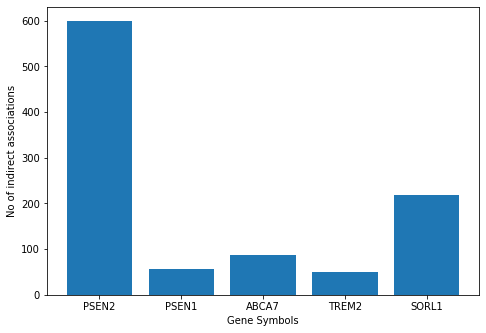

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['PSEN2', 'PSEN1', 'ABCA7', 'TREM2', 'SORL1']
students = [600,56,88,50,219]
ax.bar(langs,students)
plt.xlabel('Gene Symbols')
plt.ylabel('No of indirect associations')
plt.show()

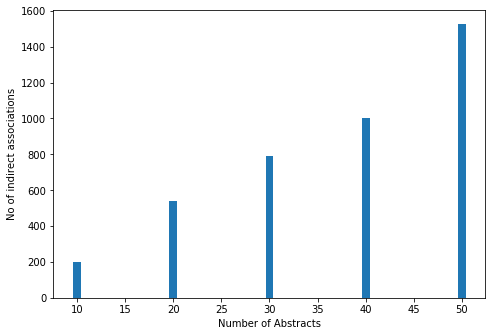

In [51]:
import matplotlib.pyplot as plt1
fig1 = plt1.figure()
ax1 = fig1.add_axes([0,0,1,1])
samples =[10,20,30,40,50]
genes=[200,540,790,1005,1529]
ax1.bar(samples,genes)
plt1.xlabel('Number of Abstracts')
plt1.ylabel('No of indirect associations')
plt1.show()
